In [202]:
import os
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,969 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,357 kB]
Fetched 3,446 kB in 2s (1,803 kB/s)
Reading package lists... Done


In [203]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Energy_Cancer").getOrCreate()

In [204]:


# Read in data
from pyspark import SparkFiles

import requests
url = "https://raw.githubusercontent.com/fraserclaire/Group3_Project4/main/Artien/Machine%20Learning%20Dataset-Cancer%26Energy.csv"
response = requests.get(url)
# with open("Machine Learning Dataset-Cancer&Energy.csv", "wb") as f:
#     f.write(response.content)

spark.sparkContext.addFile(url)
cancer_energy = spark.read.csv(SparkFiles.get('Machine Learning Dataset-Cancer&Energy.csv'),inferSchema=True,header=True)

# Show DataFrame
cancer_energy.show()

+---+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+-----------------+---------------------------+---------------+-----------------+---------------------------+-------

In [205]:
#Imports for machine learning
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [206]:
cancer_energy_df = cancer_energy.toPandas()

In [207]:
cancer_energy_df.head()

,_c0,State Abbreviation,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),...,2020_LungBronchus,2020_LungBronchus_perCapita,2020_Population,2021 Lung & Bronchus,2021_Population,2021_LungBronchus_perCapita,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Lung/Bronchus_Classifer,Change from 2011 to 2020 (percapita)
0,0,AK,15481,15521,14819,18225,19511,16613,16376,17325,...,400,0.000546,732964.0,370,734923,0.000503,0.004628,0.000591,0,0.000020
1,1,AL,651032,547004,565051,575912,494311,410168,378890,377152,...,4230,0.000841,5031864.0,4520,5050380,0.000895,0.005554,0.000867,1,-0.000043
2,2,AR,306119,296732,327099,339214,226889,246437,267591,304145,...,2760,0.000916,3014348.0,2970,3028443,0.000981,0.005473,0.000898,1,0.000011
3,3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,...,4200,0.000584,7186683.0,4550,7272487,0.000626,0.004939,0.000595,1,-0.000006
4,4,CA,55264,43832,38151,39486,30967,32077,33663,33256,...,18040,0.000457,39503200.0,17760,39145060,0.000454,0.004456,0.000473,0,-0.000012


In [208]:
# prompt: drop the _c0 column, state, 2021 lung cancer/capita columns from the cancer_energy_df pandas dataframe

cancer_energy_df = cancer_energy_df.drop(columns=["_c0","State Abbreviation","State","2021_LungBronchus_perCapita"])


In [209]:
cancer_energy_df.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2019_Population,2020_LungBronchus,2020_LungBronchus_perCapita,2020_Population,2021 Lung & Bronchus,2021_Population,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Lung/Bronchus_Classifer,Change from 2011 to 2020 (percapita)
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,731545,400,0.000546,732964.0,370,734923,0.004628,0.000591,0,0.000020
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,4903185,4230,0.000841,5031864.0,4520,5050380,0.005554,0.000867,1,-0.000043
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,3017804,2760,0.000916,3014348.0,2970,3028443,0.005473,0.000898,1,0.000011
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,7278717,4200,0.000584,7186683.0,4550,7272487,0.004939,0.000595,1,-0.000006
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,39512223,18040,0.000457,39503200.0,17760,39145060,0.004456,0.000473,0,-0.000012


In [210]:
X = cancer_energy_df.copy()
X.drop('Lung/Bronchus_Classifer',axis=1,inplace=True)
X.head()



,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2019_LungBronchus_perCapita,2019_Population,2020_LungBronchus,2020_LungBronchus_perCapita,2020_Population,2021 Lung & Bronchus,2021_Population,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Change from 2011 to 2020 (percapita)
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,0.000547,731545,400,0.000546,732964.0,370,734923,0.004628,0.000591,0.000020
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,0.000846,4903185,4230,0.000841,5031864.0,4520,5050380,0.005554,0.000867,-0.000043
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,0.000891,3017804,2760,0.000916,3014348.0,2970,3028443,0.005473,0.000898,0.000011
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,0.000589,7278717,4200,0.000584,7186683.0,4550,7272487,0.004939,0.000595,-0.000006
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,0.000481,39512223,18040,0.000457,39503200.0,17760,39145060,0.004456,0.000473,-0.000012


In [211]:
y = cancer_energy_df['Lung/Bronchus_Classifer']
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Lung/Bronchus_Classifer, dtype: int32

In [212]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [213]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [214]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [215]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [216]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1250)

In [217]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [218]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [219]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [220]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2,0
Actual 1,2,9


Accuracy Score : 0.8461538461538461
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.82      0.90        11

    accuracy                           0.85        13
   macro avg       0.75      0.91      0.78        13
weighted avg       0.92      0.85      0.86        13



In [221]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.03865656191951395, '2011_LungBronchus_perCapita'),
 (0.03370110743497199, '2012_LungBronchus_perCapita'),
 (0.028344706775101917, '2011-2020 allsites/capita AVG'),
 (0.0252762152437813, '2017_LungBronchus_perCapita'),
 (0.023819294595009973, '2018_LungBronchus_perCapita'),
 (0.02317435188723749, '2013_LungBronchus_perCapita'),
 (0.019980156623616158, '2020_LungBronchus_perCapita'),
 (0.01860945092257414, '2015_LungBronchus_perCapita'),
 (0.01806759521708546, '2011-2020 lungBronchus/capita AVG'),
 (0.01702732885369517, '2019(TR)'),
 (0.01663067632517991, '2019_LungBronchus_perCapita'),
 (0.016291018378623217, '2018(S)'),
 (0.015803551173155496, '2018(TR)'),
 (0.015410989208923396, '2013(S)'),
 (0.014797932202960055, '2016_LungBronchus_perCapita'),
 (0.014291557637741311, 'Change from 2011 to 2020 (percapita)'),
 (0.013953615083530001, '2012(S)'),
 (0.013441033062170687, '2015(S)'),
 (0.012176055282398294, '2019(S)'),
 (0.012039472823760783, '2011(S)'),
 (0.011958790493212862, '2014_

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

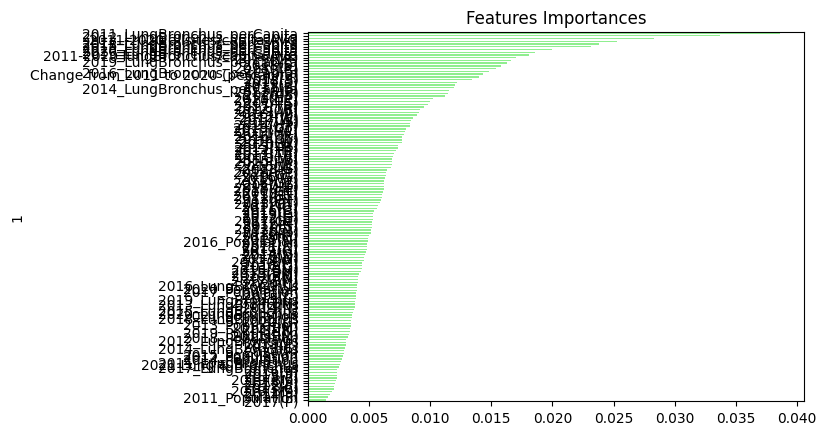

In [222]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

<Axes: title={'center': 'Top 20 Most Important Features'}, ylabel='1'>

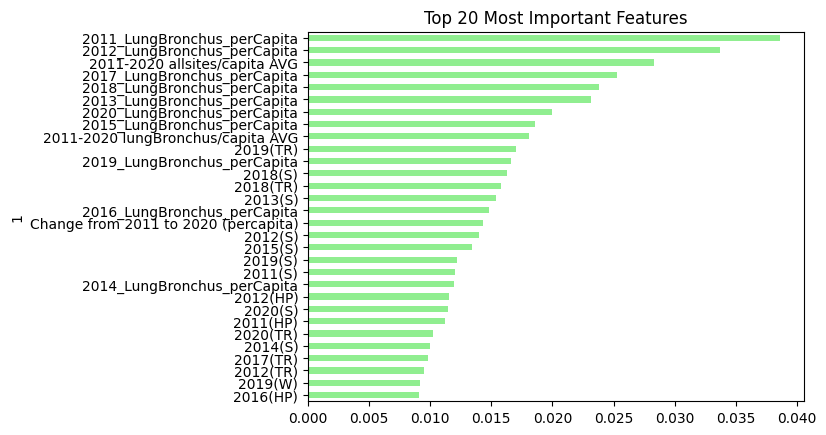

In [223]:
# Visualize the top 20 most important features
importances_top20 = importances_sorted.tail(30)  # Select the bottom 20 (top 20 in terms of importance)
importances_top20.plot(kind='barh', color='lightgreen', title='Top 20 Most Important Features', legend=False)

In [224]:
#Try dropping the Population and Cancer count columns for each year to see if that improves accuracy
dropped_pop = cancer_energy_df.drop(columns = ['2011_Population','2012_Population','2013_Population','2014_Population','2015_Population','2016_Population','2017_Population','2018_Population','2019_Population','2020_Population','2021_Population'])

In [225]:
dropped_pop.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2018_LungBronchus_perCapita,2019_LungBronchus,2019_LungBronchus_perCapita,2020_LungBronchus,2020_LungBronchus_perCapita,2021 Lung & Bronchus,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Lung/Bronchus_Classifer,Change from 2011 to 2020 (percapita)
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,0.000626,400,0.000547,400,0.000546,370,0.004628,0.000591,0,0.000020
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,0.000857,4150,0.000846,4230,0.000841,4520,0.005554,0.000867,1,-0.000043
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,0.000904,2690,0.000891,2760,0.000916,2970,0.005473,0.000898,1,0.000011
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,0.000623,4290,0.000589,4200,0.000584,4550,0.004939,0.000595,1,-0.000006
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,0.000475,18990,0.000481,18040,0.000457,17760,0.004456,0.000473,0,-0.000012


In [226]:
X = dropped_pop.copy()
X.drop('Lung/Bronchus_Classifer',axis=1,inplace=True)
X.head()


,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2018_LungBronchus,2018_LungBronchus_perCapita,2019_LungBronchus,2019_LungBronchus_perCapita,2020_LungBronchus,2020_LungBronchus_perCapita,2021 Lung & Bronchus,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Change from 2011 to 2020 (percapita)
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,460,0.000626,400,0.000547,400,0.000546,370,0.004628,0.000591,0.000020
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,4190,0.000857,4150,0.000846,4230,0.000841,4520,0.005554,0.000867,-0.000043
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,2720,0.000904,2690,0.000891,2760,0.000916,2970,0.005473,0.000898,0.000011
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,4460,0.000623,4290,0.000589,4200,0.000584,4550,0.004939,0.000595,-0.000006
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,18760,0.000475,18990,0.000481,18040,0.000457,17760,0.004456,0.000473,-0.000012


In [227]:
# Define target vector
y = dropped_pop["Lung/Bronchus_Classifer"]
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Lung/Bronchus_Classifer, dtype: int32

In [228]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [229]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [230]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [231]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [232]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000)

In [233]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [234]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [235]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [236]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3,2
Actual 1,3,5


Accuracy Score : 0.6153846153846154
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.71      0.62      0.67         8

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13



<Axes: title={'center': 'Top 20 Most Important Features'}, ylabel='1'>

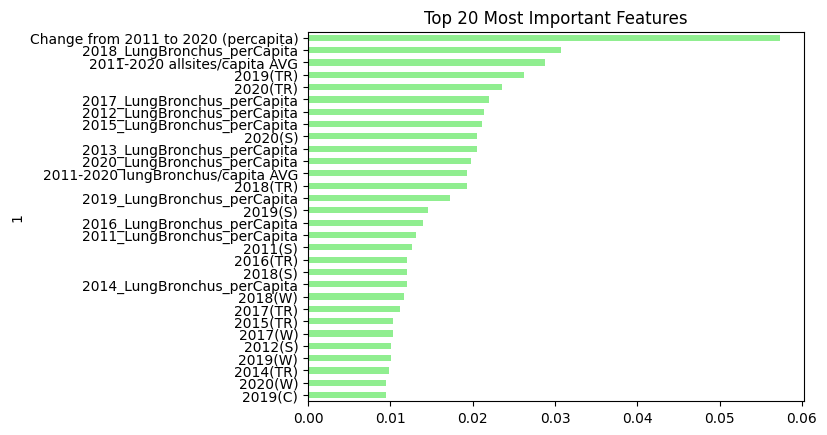

In [237]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_top20 = importances_sorted.tail(30)
importances_top20.plot(kind='barh', color='lightgreen', title='Top 20 Most Important Features', legend=False)

In [238]:
dropped_pop_and_cancercount = dropped_pop.drop(columns=['2011_LungBronchus','2012_LungBronchus','2013_LungBronchus','2014_LungBronchus','2015_LungBronchus','2016_LungBronchus','2017_LungBronchus','2018_LungBronchus','2019_LungBronchus','2020_LungBronchus','2021 Lung & Bronchus'])

In [239]:
# Define features set
X = dropped_pop_and_cancercount.copy()
X.drop("Lung/Bronchus_Classifer", axis=1, inplace=True)
X.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2014_LungBronchus_perCapita,2015_LungBronchus_perCapita,2016_LungBronchus_perCapita,2017_LungBronchus_perCapita,2018_LungBronchus_perCapita,2019_LungBronchus_perCapita,2020_LungBronchus_perCapita,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Change from 2011 to 2020 (percapita)
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,0.000584,0.000569,0.000593,0.000608,0.000626,0.000547,0.000546,0.004628,0.000591,0.000020
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,0.000859,0.000855,0.000868,0.000796,0.000857,0.000846,0.000841,0.005554,0.000867,-0.000043
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,0.000896,0.000880,0.000873,0.000873,0.000904,0.000891,0.000916,0.005473,0.000898,0.000011
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,0.000636,0.000548,0.000573,0.000559,0.000623,0.000589,0.000584,0.004939,0.000595,-0.000006
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,0.000487,0.000474,0.000463,0.000464,0.000475,0.000481,0.000457,0.004456,0.000473,-0.000012


In [240]:
# Define target vector
y = dropped_pop_and_cancercount["Lung/Bronchus_Classifer"]
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Lung/Bronchus_Classifer, dtype: int32

In [241]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [242]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [243]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [244]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [245]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000)

In [246]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [247]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [248]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [249]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2,0
Actual 1,2,9


Accuracy Score : 0.8461538461538461
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.82      0.90        11

    accuracy                           0.85        13
   macro avg       0.75      0.91      0.78        13
weighted avg       0.92      0.85      0.86        13



In [250]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.03189615199189231, '2011_LungBronchus_perCapita'),
 (0.0270247131374517, '2011-2020 allsites/capita AVG'),
 (0.026688966563602617, '2012_LungBronchus_perCapita'),
 (0.02665890923414224, '2013_LungBronchus_perCapita'),
 (0.02619887972672449, '2018_LungBronchus_perCapita'),
 (0.026141851550826736, '2020_LungBronchus_perCapita'),
 (0.023184516097698674, '2015_LungBronchus_perCapita'),
 (0.022753656781884953, '2018(TR)'),
 (0.021057942781844027, 'Change from 2011 to 2020 (percapita)'),
 (0.020416573834038193, '2013(S)'),
 (0.019155261032176366, '2017_LungBronchus_perCapita'),
 (0.018195807898813383, '2019(TR)'),
 (0.01784445420632262, '2011-2020 lungBronchus/capita AVG'),
 (0.01636507472081021, '2011(S)'),
 (0.01590516549130866, '2019_LungBronchus_perCapita'),
 (0.014773607805856818, '2015(S)'),
 (0.014607354241406417, '2017(TR)'),
 (0.014257132934417632, '2011(TR)'),
 (0.014139420389211644, '2014(TR)'),
 (0.013372510167864535, '2016_LungBronchus_perCapita'),
 (0.013066480069125528, '2

<Axes: title={'center': 'Top 20 Most Important Features'}, ylabel='1'>

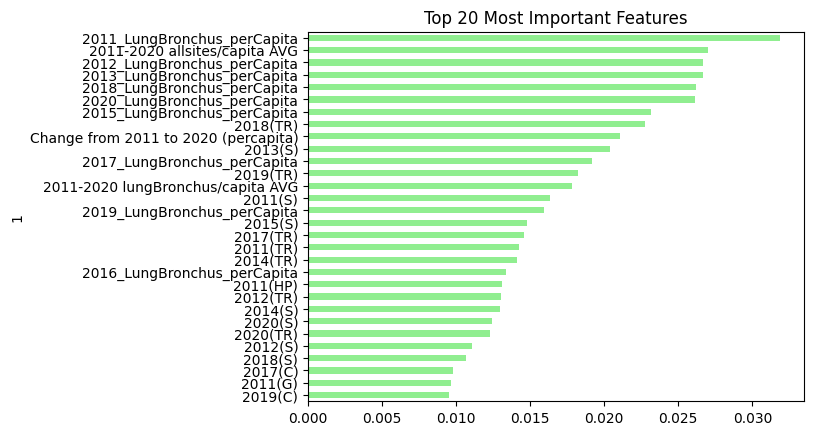

In [251]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_top20 = importances_sorted.tail(30)
importances_top20.plot(kind='barh', color='lightgreen', title='Top 20 Most Important Features', legend=False)